# Inference: Log priors

This example notebook illustrates some of the functionality that is available for `LogPrior` objects that are currently available within PINTS.

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

The uniform prior, $U\sim(a, b)$, here with $a=-10$ and $b=15$. When this function is called, its log density is returned.

In [14]:
log_prior = pints.UniformLogPrior(-10, 15)

print('U(0|a=-10, b=15) = ' + str(log_prior([0])))

U(0|a=-10, b=15) = -3.21887582487


To plot the density, we thus just take the exponential of its log density.

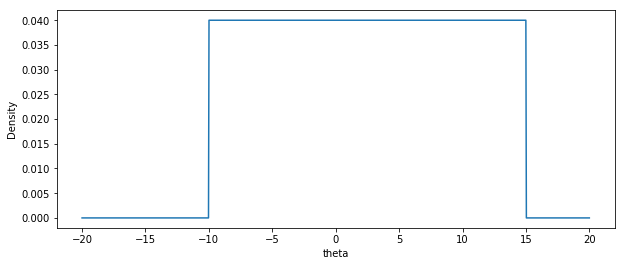

In [3]:
values = np.linspace(-20, 20, 1000)
log_prob = map(lambda x: np.exp(log_prior([x])), values)

plt.figure(figsize=(10,4))
plt.xlabel('theta')
plt.ylabel('Density')
plt.plot(values, log_prob)
plt.show()

To specify a multidimensional uniform prior, use the same function. Here we specify, $\theta_1\sim U(2, 4)$ and $\theta_2\sim U(-7,-5)$.

In [4]:
log_prior = pints.UniformLogPrior([2, -7], [4, -5])

Plot $p(\theta_2|\theta_1 = 3)$.

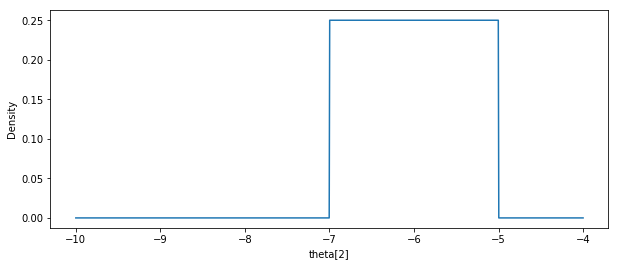

In [5]:
values = np.linspace(-10, -4, 1000)
log_prob = map(lambda x: np.exp(log_prior([3, x])), values)

plt.figure(figsize=(10,4))
plt.xlabel('theta[2]')
plt.ylabel('Density')
plt.plot(values, log_prob)
plt.show()

If you have a prior constrained to lie $\in[0,1]$, you can use a beta prior.

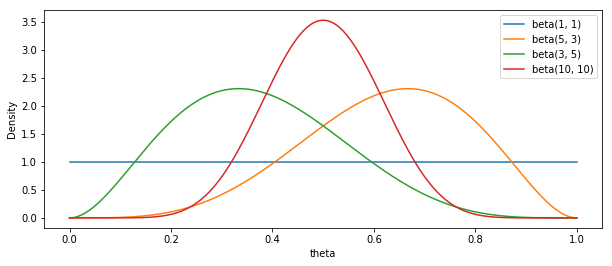

In [16]:
log_prior1 = pints.BetaLogPrior(1, 1)
log_prior2 = pints.BetaLogPrior(5, 3)
log_prior3 = pints.BetaLogPrior(3, 5)
log_prior4 = pints.BetaLogPrior(10, 10)

values = np.linspace(0, 1, 1000)
log_prob1 = map(lambda x: np.exp(log_prior1([x])), values)
log_prob2 = map(lambda x: np.exp(log_prior2([x])), values)
log_prob3 = map(lambda x: np.exp(log_prior3([x])), values)
log_prob4 = map(lambda x: np.exp(log_prior4([x])), values)

plt.figure(figsize=(10,4))
plt.xlabel('theta')
plt.ylabel('Density')
plt.plot(values, log_prob1)
plt.plot(values, log_prob2)
plt.plot(values, log_prob3)
plt.plot(values, log_prob4)
plt.legend(['beta(1, 1)', 'beta(5, 3)', 'beta(3, 5)', 'beta(10, 10)'])
plt.show()

Specifying a value outside the support of the distribution returns $-\infty$ for the log density.

In [18]:
print('beta(-0.5|a=1, b=1) = ' + str(log_prior1([-0.5])))

beta(-0.5|a=1, b=1) = -inf


Each prior has a `mean` function that allows you to quickly check what parameterisation is being used.

In [8]:
print('mean = ' + str(log_prior3.mean()))

mean = 0.375


Each prior also has a `sample` function which allows generation of independent samples from each distribution. Using this we can sample from a Student-t density, with input dimensions `(location, degrees of freedom, scale)`.

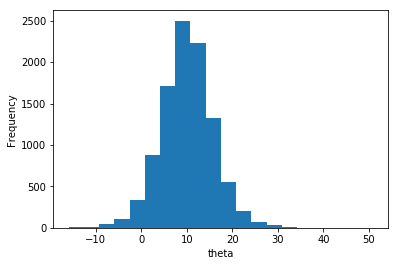

In [9]:
n = 10000
log_prior = pints.StudentTLogPrior(10, 8, 5)
samples = log_prior.sample(n)

plt.hist(samples, 20)
plt.xlabel('theta')
plt.ylabel('Frequency')
plt.show()

For models with multiple parameters, we can specify different distributions for each dimension using `ComposedLogPrior`.

In [10]:
log_prior1 = pints.GaussianLogPrior(-1, 3)
log_prior2 = pints.InverseGammaLogPrior(5, 5)
log_prior3 = pints.LogNormalLogPrior(-1, 1)
log_prior = pints.ComposedLogPrior(log_prior1, log_prior2, log_prior3)

# calling
log_prior([-3, 1, 6])

-8.9782957817174314

Functions like `sample` and `mean` also work for `ComposedLogPrior` objects.

mean = [-1.0, 1.25, 0.60653065971263342]


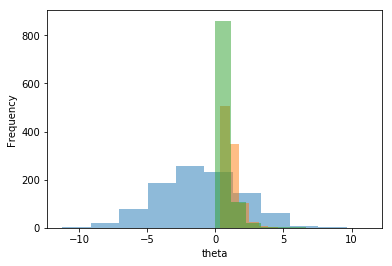

In [11]:
print('mean = ' + str(log_prior.mean()))

n = 10
samples = log_prior.sample(1000)
plt.hist(samples[:, 0], alpha=0.5)
plt.hist(samples[:, 1], alpha=0.5)
plt.hist(samples[:, 2], alpha=0.5)
plt.xlabel('theta')
plt.ylabel('Frequency')
plt.show()

We also have multivariate priors in PINTS. For example, the multivariate Gaussian.

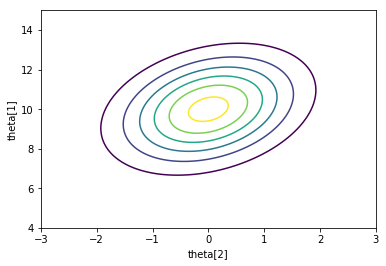

In [12]:
log_prior = pints.MultivariateGaussianLogPrior([0, 10], [[1, 0.5], [0.5, 3]])

# Contour plot of pdf
x = np.linspace(-3, 3, 100)
y = np.linspace(4, 15, 100)
X, Y = np.meshgrid(x, y)
Z = [[np.exp(log_prior([i, j])) for i in x] for j in y]
plt.contour(X, Y, Z)
plt.xlabel('theta[2]')
plt.ylabel('theta[1]')
plt.show()